In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io, filters, img_as_ubyte
from scipy.signal import convolve2d as conv2
import scipy.ndimage
import math
import cv2
from skimage.measure import find_contours

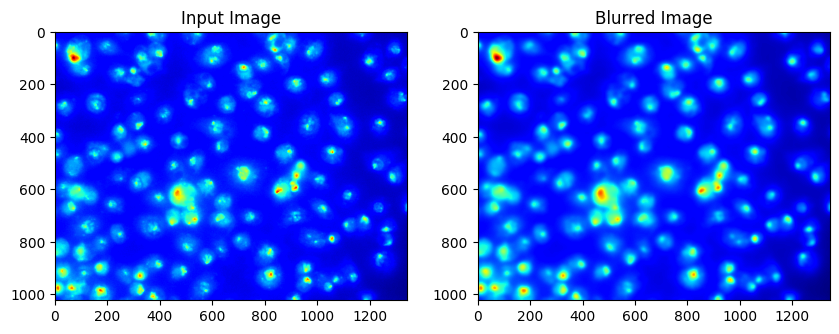

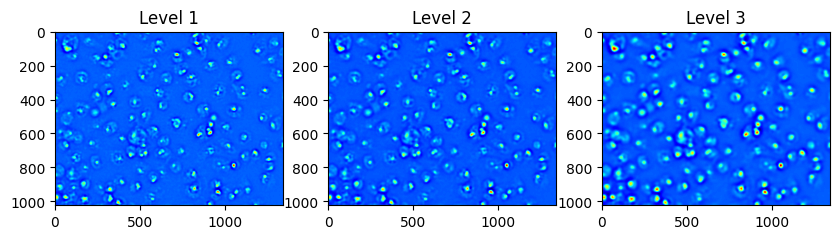

In [ ]:
# -----------------------------PART 1 -----------------------------


imfile = '/content/drive/My Drive/cmput 206/assignment4/nuclei.png'
I = io.imread(imfile)

# Apply Gaussian filter
# NOTE: You can use filters.gaussian.
sig = 5

J = filters.gaussian(I,sigma=sig)

# Plotting Input image and Blurred image
plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(I,cmap='jet'), plt.title('Input Image')
plt.subplot(122),plt.imshow(J,cmap='jet'),plt.title('Blurred Image')
plt.show()


# =========== 1. Create DoG volume ===========
# In the list 'sigmas', 4 values of sigmas (in order) have been provided. You have to use these to create 3 DoG levels.
# Level 1 --> gaussian(J, first sigma value) - gaussian(J, second sigma value)
# Level 2 --> gaussian(J,second sigma value) - gaussian(J, third sigma value)
# Level 3 ---> gaussian(J,third sigma value) - gaussian(J, fourth sigma value)

# NOTE: You can use filters.gaussian. You CANNOT use skimage.filters.difference_of_gaussians.
# Each level should be saved in the corresponding index of variable DoG


sigmas = [1.75 ** i for i in range(1,5)]
[h, w] = I.shape
DoG = np.zeros([h, w, 3])

#TODO: Create DoG levels
for i in range(3):
    DoG[:, :, i] = filters.gaussian(J, sigma=sigmas[i]) - filters.gaussian(J, sigma=sigmas[i+1])

level1 = DoG[:, :, 0]
level2 = DoG[:, :, 1]
level3 = DoG[:, :, 2]

# Plotting
plt.figure(figsize=(10,8))
plt.subplot(131), plt.imshow(level1,cmap='jet'), plt.title('Level 1')
plt.subplot(132), plt.imshow(level2,cmap='jet'), plt.title('Level 2')
plt.subplot(133), plt.imshow(level3,cmap='jet'), plt.title('Level 3')
plt.show()

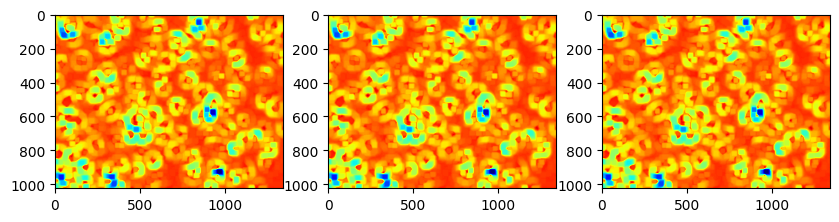

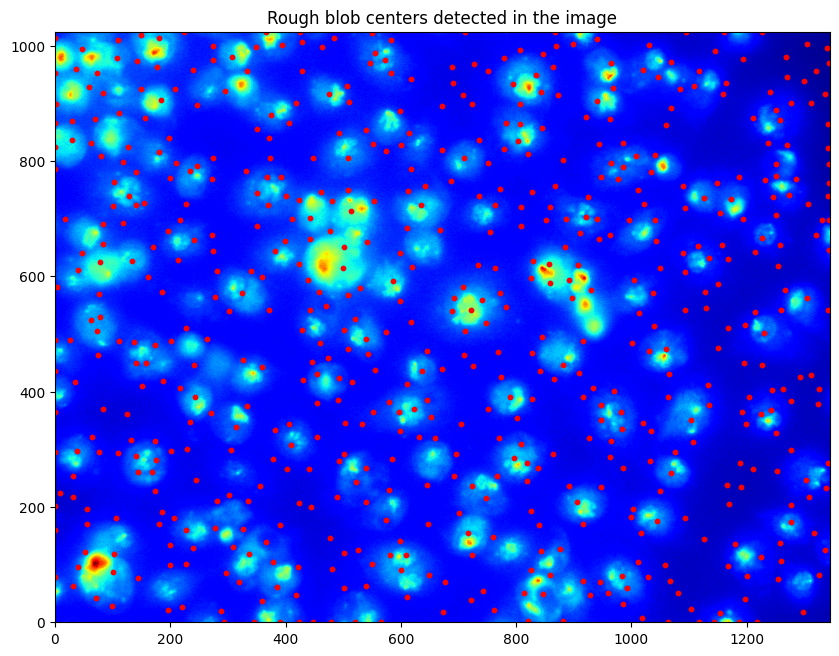

In [ ]:
# =========== 2. Obtain a rough estimate of blob center locations ===========
scatter_size = 40
scatter_col = 'r'

# TODO: Detect regional minima within the DoG volume. You can check out scipy.ndimage.filters.minimum_filter.
local_minima = scipy.ndimage.minimum_filter(DoG, size=20, mode='reflect')
# local_minima = np.zeros(DoG.shape, dtype=bool)
# for i in range(3):
#     local_minima = scipy.ndimage.minimum_filter(DoG[:, :, i], size=3, mode='reflect')
    # Detect local minima by comparing the slice to its filtered version



# Plotting
plt.figure(figsize=(10,8))
plt.subplot(131), plt.imshow(local_minima[..., 0],cmap='jet')
plt.subplot(132), plt.imshow(local_minima[..., 1],cmap='jet')
plt.subplot(133), plt.imshow(local_minima[..., 2],cmap='jet')
plt.show()

# TODO: Convert local_minima to a binary image A (Check the stackoverflow discussion linked on e-class for reference)
A = (DoG == local_minima)
# A = local_minima.astype(int)


# TODO: Collapse this 3D binary image into a single channel image and assign to variable B (Check out np.sum)
B = np.sum(A, axis=2)


# TODO: Show the locations of all non-zero entries in this collapsed array overlaid on the input image as red points.

# Check out np.nonzero()
[y,x] = np.nonzero(B)


# Plotting
plt.figure(figsize=(10,8))
plt.imshow(I,cmap='jet')
plt.scatter(x, y, marker='.', color=scatter_col, s=scatter_size)
plt.xlim([0, I.shape[1]])
plt.ylim([0, I.shape[0]])
plt.title('Rough blob centers detected in the image')
plt.show()


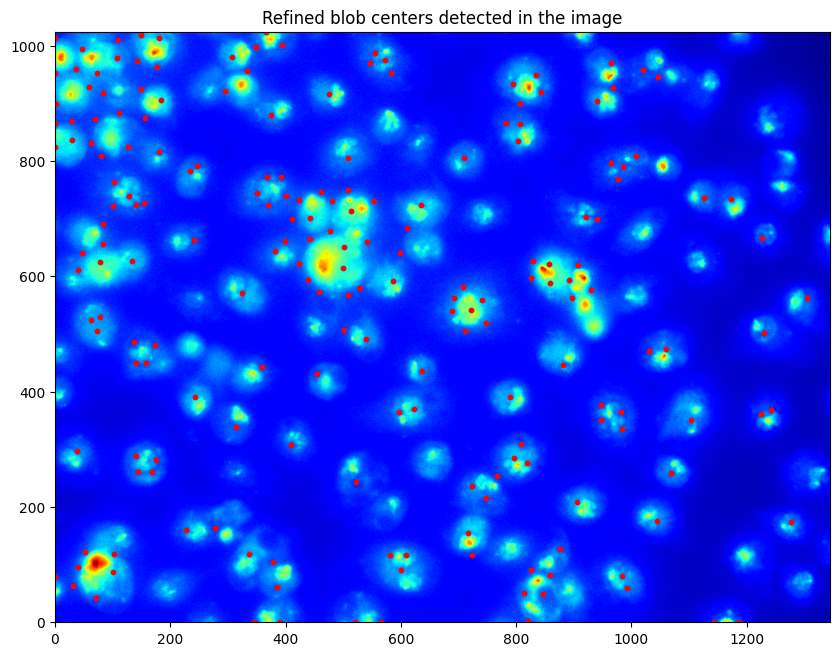

In [ ]:
# =========== 3. Refine the blob centers using Li thresholding ===========

# Apply Gaussian filtering using skimage.filters.gaussian with a suitably chosen sigma and convert to unit8
J = filters.gaussian(J, sigma =2)
J = img_as_ubyte(J)

# TODO: Apply Li thresholding on the blurred image using filters.threshold_li to obtain the optimal threshold for this image
threshold = filters.threshold_li(J)

# TODO: Remove all minima in the output image (B) of "Obtain a rough estimate of blob locations" (Part 1, q2) where pixel values
#          are less than the obtained threshold. Assign this output to variable final

final = np.copy(B)
final[J < threshold] = 0


# TODO: Show the remaining minima locations overlaid on the input image as red points. Once again, you can use np.nonzero()
[y, x] = np.nonzero(final)


# Plotting
plt.figure(figsize=(10,8))
plt.imshow(I,cmap='jet')
plt.scatter(x, y, marker='.', color=scatter_col, s=scatter_size)
plt.xlim([0, I.shape[1]])
plt.ylim([0, I.shape[0]])
plt.title('Refined blob centers detected in the image')
plt.show()

In [4]:
def part1():
    # -----------------------------PART 1 -----------------------------


  imfile = '/content/drive/My Drive/cmput 206/assignment4/nuclei.png'
  I = io.imread(imfile)

  # Apply Gaussian filter
  # NOTE: You can use filters.gaussian.
  sig = 5

  J = filters.gaussian(I,sigma=sig)

  # Plotting Input image and Blurred image
  plt.figure(figsize=(10,8))
  plt.subplot(121),plt.imshow(I,cmap='jet'), plt.title('Input Image')
  plt.subplot(122),plt.imshow(J,cmap='jet'),plt.title('Blurred Image')
  plt.show()


  # =========== 1. Create DoG volume ===========
  # In the list 'sigmas', 4 values of sigmas (in order) have been provided. You have to use these to create 3 DoG levels.
  # Level 1 --> gaussian(J, first sigma value) - gaussian(J, second sigma value)
  # Level 2 --> gaussian(J,second sigma value) - gaussian(J, third sigma value)
  # Level 3 ---> gaussian(J,third sigma value) - gaussian(J, fourth sigma value)

  # NOTE: You can use filters.gaussian. You CANNOT use skimage.filters.difference_of_gaussians.
  # Each level should be saved in the corresponding index of variable DoG


  sigmas = [1.75 ** i for i in range(1,5)]
  [h, w] = I.shape
  DoG = np.zeros([h, w, 3])

  #TODO: Create DoG levels
  for i in range(3):
      DoG[:, :, i] = filters.gaussian(J, sigma=sigmas[i]) - filters.gaussian(J, sigma=sigmas[i+1])

  level1 = DoG[:, :, 0]
  level2 = DoG[:, :, 1]
  level3 = DoG[:, :, 2]

  # Plotting
  plt.figure(figsize=(10,8))
  plt.subplot(131), plt.imshow(level1,cmap='jet'), plt.title('Level 1')
  plt.subplot(132), plt.imshow(level2,cmap='jet'), plt.title('Level 2')
  plt.subplot(133), plt.imshow(level3,cmap='jet'), plt.title('Level 3')
  plt.show()

  # =========== 2. Obtain a rough estimate of blob center locations ===========
  scatter_size = 40
  scatter_col = 'r'

  # TODO: Detect regional minima within the DoG volume. You can check out scipy.ndimage.filters.minimum_filter.
  local_minima = scipy.ndimage.minimum_filter(DoG, size=20, mode='reflect')
  # local_minima = np.zeros(DoG.shape, dtype=bool)
  # for i in range(3):
  #     local_minima = scipy.ndimage.minimum_filter(DoG[:, :, i], size=3, mode='reflect')
      # Detect local minima by comparing the slice to its filtered version



  # Plotting
  plt.figure(figsize=(10,8))
  plt.subplot(131), plt.imshow(local_minima[..., 0],cmap='jet')
  plt.subplot(132), plt.imshow(local_minima[..., 1],cmap='jet')
  plt.subplot(133), plt.imshow(local_minima[..., 2],cmap='jet')
  plt.show()

  # TODO: Convert local_minima to a binary image A (Check the stackoverflow discussion linked on e-class for reference)
  A = (DoG == local_minima)
  # A = local_minima.astype(int)


  # TODO: Collapse this 3D binary image into a single channel image and assign to variable B (Check out np.sum)
  B = np.sum(A, axis=2)


  # TODO: Show the locations of all non-zero entries in this collapsed array overlaid on the input image as red points.

  # Check out np.nonzero()
  [y,x] = np.nonzero(B)


  # Plotting
  plt.figure(figsize=(10,8))
  plt.imshow(I,cmap='jet')
  plt.scatter(x, y, marker='.', color=scatter_col, s=scatter_size)
  plt.xlim([0, I.shape[1]])
  plt.ylim([0, I.shape[0]])
  plt.title('Rough blob centers detected in the image')
  plt.show()

  # =========== 3. Refine the blob centers using Li thresholding ===========

  # Apply Gaussian filtering using skimage.filters.gaussian with a suitably chosen sigma and convert to unit8
  J = filters.gaussian(J, sigma =2)
  J = img_as_ubyte(J)

  # TODO: Apply Li thresholding on the blurred image using filters.threshold_li to obtain the optimal threshold for this image
  threshold = filters.threshold_li(J)

  # TODO: Remove all minima in the output image (B) of "Obtain a rough estimate of blob locations" (Part 1, q2) where pixel values
  #          are less than the obtained threshold. Assign this output to variable final

  final = np.copy(B)
  final[J < threshold] = 0


  # TODO: Show the remaining minima locations overlaid on the input image as red points. Once again, you can use np.nonzero()
  [y, x] = np.nonzero(final)


  # Plotting
  plt.figure(figsize=(10,8))
  plt.imshow(I,cmap='jet')
  plt.scatter(x, y, marker='.', color=scatter_col, s=scatter_size)
  plt.xlim([0, I.shape[1]])
  plt.ylim([0, I.shape[0]])
  plt.title('Refined blob centers detected in the image')
  plt.show()


In [5]:
# ----------------------------- PART 2 -----------------------------

def getSmallestNeighborIndex(img, row, col):
    """
    Parameters :
    img            - image
    row            - row index of pixel
    col            - col index of pixel

    Returns         :  The location of the smallest 4-connected neighbour of pixel at location [row,col]

    """

    min_row_id = -1
    min_col_id = -1
    min_val = np.inf
    h, w = img.shape
    for row_id in range(row - 1, row + 2):
        if row_id < 0 or row_id >= h:
            continue
        for col_id in range(col - 1, col + 2):
            if col_id < 0 or col_id >= w:
                continue
            if row_id == row and col_id == col:
                continue
            if is_4connected(row, col, row_id, col_id):
              if img[row_id, col_id] < min_val:
                  min_row_id = row_id
                  min_col_id = col_id
                  min_val = img[row_id, col_id]
    return min_row_id, min_col_id

In [6]:
# TO - DO: Complete the function is_4connected
def is_4connected(row, col, row_id, col_id):

    """
    Parameters :
    row            - row index of pixel
    col            - col index of pixel
    row_id         - row index of neighbour pixel
    col_id         - col index of neighbour pixel

    Returns         :  Boolean. Whether pixel at location [row_id, col_id] is a 4 connected neighbour of pixel at location [row, col]

    """
    return abs(row - row_id) + abs(col - col_id) == 1


In [7]:
# TO - DO: Complete the function getRegionalMinima
import numpy as np

def getRegionalMinima(img):

    markers = np.zeros(img.shape, dtype=np.int32)
    h, w = img.shape

    label = 1  # Start labeling from 1

    for row in range(h):
        for col in range(w):
            pixel_val = img[row, col]
            is_minima = True
            # Check 4-connected neighbors
            for row_id in range(max(0, row - 1), min(h, row + 2)):
                for col_id in range(max(0, col - 1), min(w, col + 2)):
                    if not (row_id == row and col_id == col) and is_4connected(row, col, row_id, col_id):
                        neighbor_val = img[row_id, col_id]
                        if neighbor_val < pixel_val:
                            is_minima = False
                            break
                if not is_minima:
                    break
            # Assign a unique non-zero label to each minima
            if is_minima:
                markers[row, col] = label
                label += 1  # Increment the label for the next minima

    return markers


In [8]:
def iterativeMinFollowing(img, markers):
    """
    Parameters :
    img          - image
    markers      - returned from function getRegionalMinima(img)

    Returns       :  final labels (markers_copy)
    """

    markers_copy = np.copy(markers)
    h, w = img.shape

    # i here is for printing iteration
    # i = 1

    while True:
        # Number of pixels unmarked (label value is still 0)
        n_unmarked_pix = 0

        for row in range(h):
            for col in range(w):
                if markers_copy[row, col] != 0:
                    continue
                min_val = float('inf')
                min_row, min_col = -1, -1
                # Check 4-connected neighbors
                for row_id in range(max(0, row - 1), min(h, row + 2)):
                    for col_id in range(max(0, col - 1), min(w, col + 2)):
                        if not (row_id == row and col_id == col) and is_4connected(row, col, row_id, col_id):
                            neighbor_val = img[row_id, col_id]
                            if neighbor_val < min_val:
                                min_val = neighbor_val
                                min_row, min_col = row_id, col_id
                # If the minimum neighbor is labeled, copy its label
                if markers_copy[min_row, min_col] != 0:
                    markers_copy[row, col] = markers_copy[min_row, min_col]
                # If the current pixel is still unlabeled, increase the counter
                if markers_copy[row, col] == 0:
                    n_unmarked_pix += 1

        # Check if there are no unmarked pixels left, then break the loop
        if n_unmarked_pix == 0:
            break

        # NOTE: Please make sure to comment the below two print statements and i+=1 before submitting.
        # Feel free to un-comment them while working on the assignment and observing how iterativeMinFollowing works
        # print(f"labels after iteration {i}:")
        # print(markers_copy)
        # i += 1

        # Debug print, you might want to remove or comment this out in the final version
        # print('n_unmarked_pix: ', n_unmarked_pix)

    return markers_copy

In [9]:
def imreconstruct(marker, mask):
    curr_marker = (np.copy(marker)).astype(mask.dtype)
    kernel = np.ones([3, 3])
    while True:
        next_marker = cv2.dilate(curr_marker, kernel, iterations=1)
        intersection = next_marker > mask
        next_marker[intersection] = mask[intersection]
        if np.array_equal(next_marker, curr_marker):
            return curr_marker
        curr_marker = np.copy(next_marker)
    return curr_marker



# ======== DO NOT EDIT imimposemin =========
def imimposemin(marker, mask):
    # adapted from its namesake in MATLAB
    fm = np.copy(mask)
    fm[marker] = -np.inf
    fm[np.invert(marker)] = np.inf
    if mask.dtype == np.float32 or mask.dtype == np.float64:
        range = float(np.max(mask) - np.min(mask))
        if range == 0:
            h = 0.1
        else:
            h = range * 0.001
    else:
        # Add 1 to integer images.
        h = 1
    fp1 = mask + h
    g = np.minimum(fp1, fm)
    return np.invert(imreconstruct(
        np.invert(fm.astype(np.uint8)), np.invert(g.astype(np.uint8))
    ).astype(np.uint8))

In [10]:
def part1():
    # -----------------------------PART 1 -----------------------------


  imfile = '/content/drive/My Drive/cmput 206/assignment4/nuclei.png'
  I = io.imread(imfile)

  # Apply Gaussian filter
  # NOTE: You can use filters.gaussian.
  sig = 5

  J = filters.gaussian(I,sigma=sig)

  # Plotting Input image and Blurred image
  plt.figure(figsize=(10,8))
  plt.subplot(121),plt.imshow(I,cmap='jet'), plt.title('Input Image')
  plt.subplot(122),plt.imshow(J,cmap='jet'),plt.title('Blurred Image')
  plt.show()


  # =========== 1. Create DoG volume ===========
  # In the list 'sigmas', 4 values of sigmas (in order) have been provided. You have to use these to create 3 DoG levels.
  # Level 1 --> gaussian(J, first sigma value) - gaussian(J, second sigma value)
  # Level 2 --> gaussian(J,second sigma value) - gaussian(J, third sigma value)
  # Level 3 ---> gaussian(J,third sigma value) - gaussian(J, fourth sigma value)

  # NOTE: You can use filters.gaussian. You CANNOT use skimage.filters.difference_of_gaussians.
  # Each level should be saved in the corresponding index of variable DoG


  sigmas = [1.75 ** i for i in range(1,5)]
  [h, w] = I.shape
  DoG = np.zeros([h, w, 3])

  #TODO: Create DoG levels
  for i in range(3):
      DoG[:, :, i] = filters.gaussian(J, sigma=sigmas[i]) - filters.gaussian(J, sigma=sigmas[i+1])

  level1 = DoG[:, :, 0]
  level2 = DoG[:, :, 1]
  level3 = DoG[:, :, 2]

  # Plotting
  plt.figure(figsize=(10,8))
  plt.subplot(131), plt.imshow(level1,cmap='jet'), plt.title('Level 1')
  plt.subplot(132), plt.imshow(level2,cmap='jet'), plt.title('Level 2')
  plt.subplot(133), plt.imshow(level3,cmap='jet'), plt.title('Level 3')
  plt.show()

  # =========== 2. Obtain a rough estimate of blob center locations ===========
  scatter_size = 40
  scatter_col = 'r'

  # TODO: Detect regional minima within the DoG volume. You can check out scipy.ndimage.filters.minimum_filter.
  local_minima = scipy.ndimage.minimum_filter(DoG, size=20, mode='reflect')
  # local_minima = np.zeros(DoG.shape, dtype=bool)
  # for i in range(3):
  #     local_minima = scipy.ndimage.minimum_filter(DoG[:, :, i], size=3, mode='reflect')
      # Detect local minima by comparing the slice to its filtered version



  # Plotting
  plt.figure(figsize=(10,8))
  plt.subplot(131), plt.imshow(local_minima[..., 0],cmap='jet')
  plt.subplot(132), plt.imshow(local_minima[..., 1],cmap='jet')
  plt.subplot(133), plt.imshow(local_minima[..., 2],cmap='jet')
  plt.show()

  # TODO: Convert local_minima to a binary image A (Check the stackoverflow discussion linked on e-class for reference)
  A = (DoG == local_minima)
  # A = local_minima.astype(int)


  # TODO: Collapse this 3D binary image into a single channel image and assign to variable B (Check out np.sum)
  B = np.sum(A, axis=2)


  # TODO: Show the locations of all non-zero entries in this collapsed array overlaid on the input image as red points.

  # Check out np.nonzero()
  [y,x] = np.nonzero(B)


  # Plotting
  plt.figure(figsize=(10,8))
  plt.imshow(I,cmap='jet')
  plt.scatter(x, y, marker='.', color=scatter_col, s=scatter_size)
  plt.xlim([0, I.shape[1]])
  plt.ylim([0, I.shape[0]])
  plt.title('Rough blob centers detected in the image')
  plt.show()

  # =========== 3. Refine the blob centers using Li thresholding ===========

  # Apply Gaussian filtering using skimage.filters.gaussian with a suitably chosen sigma and convert to unit8
  J = filters.gaussian(J, sigma =2)
  J = img_as_ubyte(J)

  # TODO: Apply Li thresholding on the blurred image using filters.threshold_li to obtain the optimal threshold for this image
  threshold = filters.threshold_li(J)

  # TODO: Remove all minima in the output image (B) of "Obtain a rough estimate of blob locations" (Part 1, q2) where pixel values
  #          are less than the obtained threshold. Assign this output to variable final

  final = np.copy(B)
  final[J < threshold] = 0


  # TODO: Show the remaining minima locations overlaid on the input image as red points. Once again, you can use np.nonzero()
  [y, x] = np.nonzero(final)


  # Plotting
  plt.figure(figsize=(10,8))
  plt.imshow(I,cmap='jet')
  plt.scatter(x, y, marker='.', color=scatter_col, s=scatter_size)
  plt.xlim([0, I.shape[1]])
  plt.ylim([0, I.shape[0]])
  plt.title('Refined blob centers detected in the image')
  plt.show()

  return final


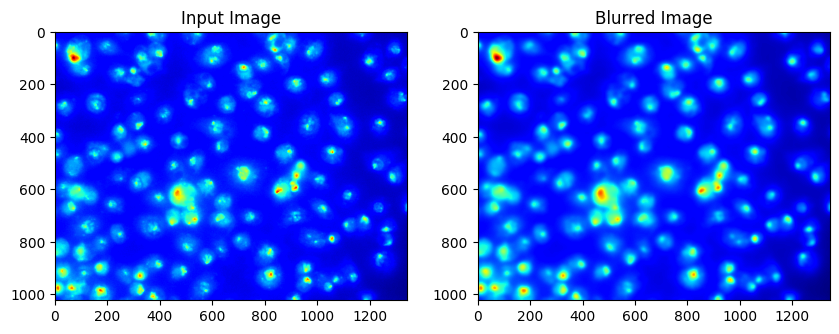

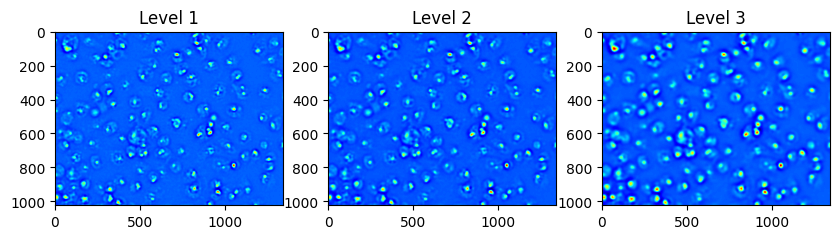

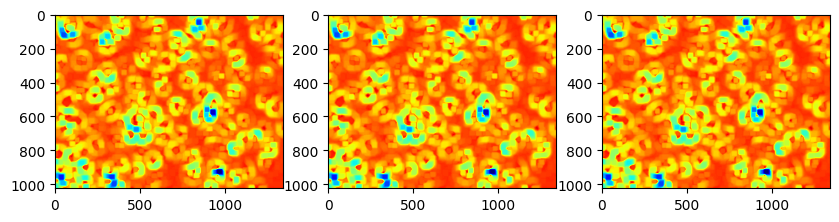

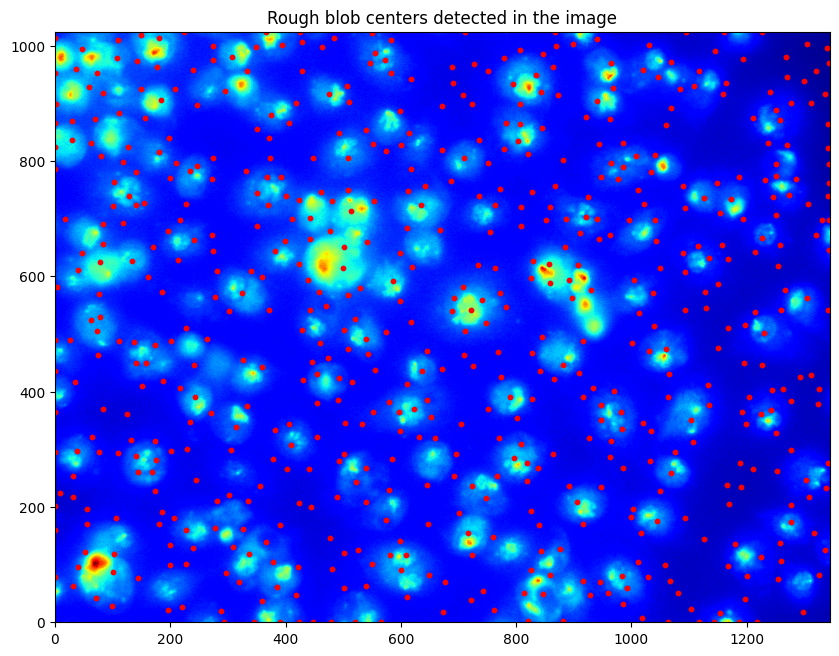

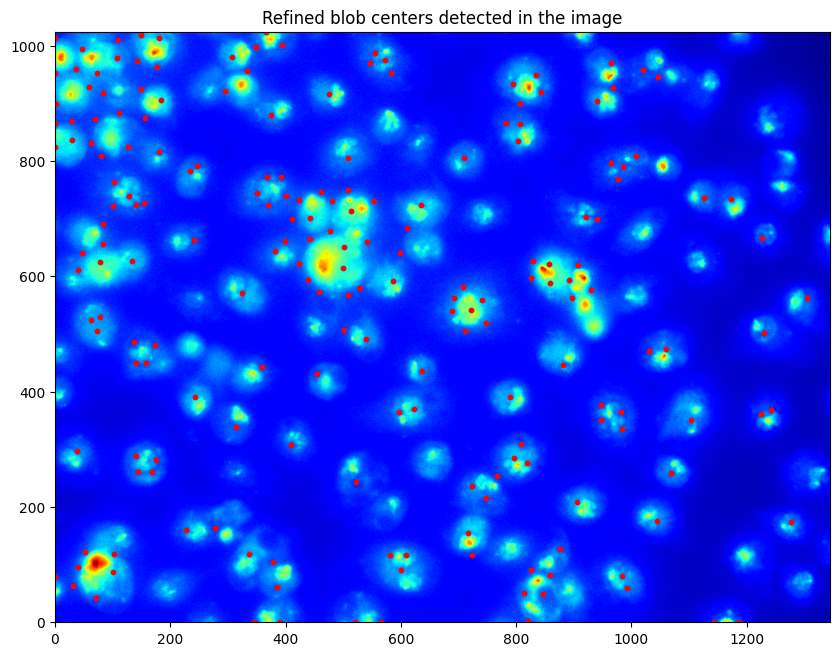

Test image:
[[ 10. 100.  20.  12.  15.]
 [ 75.   6.  30.  11.   3.]
 [ 19.  43.  38.  45.   5.]
 [  1.  22.   0.  17. 100.]
 [ 12.   7.   5. 100. 101.]
 [ 16.  66.  59. 102. 102.]]

Testing function getSmallestNeighborIndex...
Location of the smallest 4-connected neighbour of pixel at location [0,0] with intensity value 10.0: [1, 0] with value 75.0

Testing function getRegionalMinima...
markers:
[[1 0 0 0 0]
 [0 2 0 0 3]
 [0 0 0 0 0]
 [4 0 5 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Testing function iterativeMinFollowing...
Final labels:
[[1 2 3 3 3]
 [2 2 2 3 3]
 [4 2 5 3 3]
 [4 5 5 5 3]
 [4 5 5 5 3]
 [4 5 5 5 3]]


<ipython-input-9-df41238b73af>:33: RuntimeWarning: invalid value encountered in cast
  np.invert(fm.astype(np.uint8)), np.invert(g.astype(np.uint8))


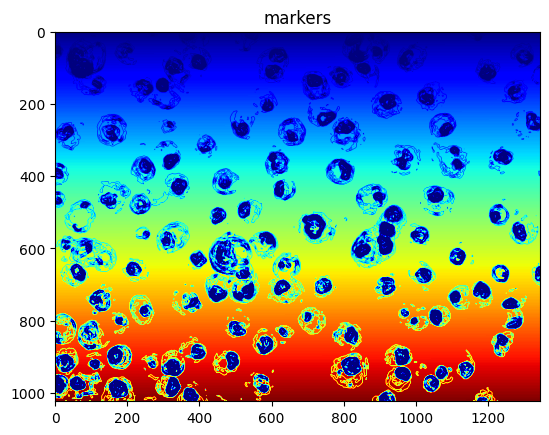

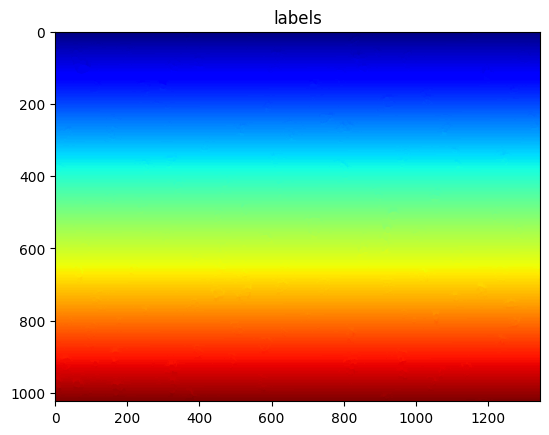

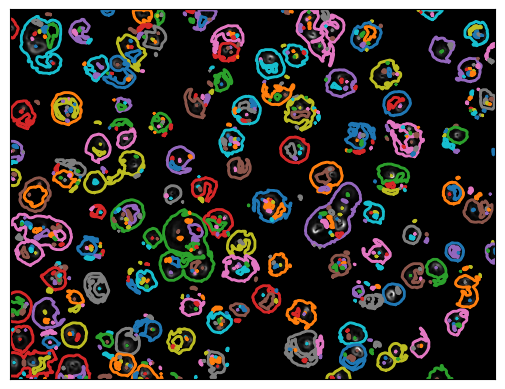

In [ ]:
def part2(final):

    # Implement Minimum Following watershed segmentation to find the boundaries of the cells we detected in part 1.


    # TO - DO: Finish functions is_4connected(row, col, row_id, col_id), getRegionalMinima(img) and iterativeMinFollowing(img, markers)


    # =============== DO NOT EDIT ANY OF THE CODE BELOW ===============

    #Test if the functions are working as expected
    test_image = np.loadtxt('/content/drive/My Drive/cmput 206/assignment4/A4_test_image.txt')
    print("Test image:")
    print(test_image)

    #Testing getSmallestNeighborIndex.
    print("\nTesting function getSmallestNeighborIndex...")
    [min_row, min_col] = getSmallestNeighborIndex(test_image, 0, 0)
    print(f"Location of the smallest 4-connected neighbour of pixel at location [0,0] with intensity value {test_image[0,0]}: {[min_row, min_col]} with value {test_image[min_row, min_col]}")

    print("\nTesting function getRegionalMinima...")
    markers = getRegionalMinima(test_image)
    print("markers:")
    print(markers)

    print("\nTesting function iterativeMinFollowing...")
    labels = iterativeMinFollowing(test_image, markers)
    print("Final labels:")
    print(labels)


    # Image reconstruct and draw their boundaries ()

    sigma = 2.5
    img_name = '/content/drive/My Drive/cmput 206/assignment4/nuclei.png'
    img_gs = io.imread(img_name).astype(np.float32)

    img_blurred = cv2.GaussianBlur(img_gs, (int(2 * round(3 * sigma) + 1), int(2 * round(3 * sigma) + 1)), sigma
                         )#borderType=cv2.BORDER_REPLICATE

    [img_grad_y, img_grad_x] = np.gradient(img_blurred)
    img_grad = np.square(img_grad_x) + np.square(img_grad_y)

    # refined blob center locations generated generated in part 1
    blob_markers = final
    img_grad_min_imposed = imimposemin(blob_markers, img_grad)

    markers = getRegionalMinima(img_grad_min_imposed)
    plt.figure(0)
    plt.imshow(markers,cmap='jet')
    plt.title('markers')
    plt.show()

    labels = iterativeMinFollowing(img_grad_min_imposed, np.copy(markers))
    plt.figure(1)
    plt.imshow(labels,cmap='jet')
    plt.title('labels')
    plt.show()

    contours = find_contours(img_grad_min_imposed , 0.8)

    fig,ax=plt.subplots()
    ax.imshow(img_grad_min_imposed, interpolation='nearest', cmap=plt.cm.gray)
    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)



    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()


if __name__  == "__main__":
    final = part1()
    part2(final)